# Deep Q Learning with Atari© Space Invaders© 🕹️👾

In this notebook we'll implement an agent **that learns to play Atari© Space Invaders© using OpenAI retro as environment library.**

Our agent after 2 hours of training (as you can see it needs much more, but **for educational purposes we can see that's a good beginning)**

![Space Invaders DQN](https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/Deep%20Q%20Learning/Space%20Invaders/assets/spaceinvaders.gif)

## Step 1: Import the libraries 📚

In [0]:
import tensorflow as tf # Deep Learning library

In [0]:
import numpy as np           # Handle matrices

In [0]:
import retro

In [7]:
!pip --version

pip 18.0 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [8]:
!pip install gym-retro

    100% |████████████████████████████████| 102.0MB 327kB/s 
    100% |████████████████████████████████| 1.5MB 9.6MB/s 
    100% |████████████████████████████████| 1.0MB 14.2MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/cb/14/71/f4ab006b1e6ff75c2b54985c2f98d0644fffe9c1dddc670925
Successfully built gym


In [0]:
import retro # Retro Environment

In [0]:
from skimage import transform # Help us to preprocess the frames
from skimage.color import rgb2gray # Help us to gray our frames

import matplotlib.pyplot as plt # Display graphs

from collections import deque # Ordered collection with ends

import random

import warnings # This ignore all the warning messages that are normally printed during the training because of skiimage
warnings.filterwarnings('ignore')

## Step 2: Create our environment 🎮

This time we use **OpenAI Retro**, a wrapper for video game emulator cores using the Libretro API to turn them into Gym environments.

![alt text](http://cdn-static.denofgeek.com/sites/denofgeek/files/styles/main_wide/public/mega-drive-main.jpg?itok=aj_clOZT)

*Source: Denofgeek*

### Our environment

Our Environment is the famous game Atari Space Invaders.

In [11]:
env = retro.make(game="SpaceInvaders-Atari2600")

FileNotFoundError: ignored

In [0]:
!mkdir downloads

In [13]:
!wget 'http://www.atarimania.com/roms/Roms.rar' -P downloads/

--2018-08-10 11:35:13--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12743583 (12M) [application/x-rar-compressed]
Saving to: ‘downloads/Roms.rar’

Roms.rar            100%[===================>]  12.15M  8.66MB/s    in 1.4s    

2018-08-10 11:35:15 (8.66 MB/s) - ‘downloads/Roms.rar’ saved [12743583/12743583]



In [14]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 129 kB of archives.
After this operation, 322 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 unrar amd64 1:5.5.8-1 [129 kB]
Fetched 129 kB in 0s (1,728 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.5.8-1_amd64.deb ...
Unpacking unrar (1:5.5.8-1) ...
Setting up unrar (1:5.5.8-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode


In [15]:
!unrar x -r downloads/Roms.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from downloads/Roms.rar

Creating    Roms                                                      OK
Extracting  Roms/HC ROMS.rar                                               0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47%  OK 
Extracting  Roms/ROMS.rar                                                 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81%

In [0]:
!mv Roms/ downloads/

In [17]:
!unrar x -r downloads/Roms/ROMS.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from downloads/Roms/ROMS.rar

Creating    ROMS                                                      OK
Extracting  ROMS/128 in 1 Game Select ROM (128 in 1) (Unknown) ~.bin       0%  OK 
Extracting  ROMS/2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Dolphin, Oink (1990) (HES) (771-341) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Dolphin, Pigs 'n' Wolf (1990) (HES) (771-341) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Dungeon Master, Creature Strike (1992) (HES) (773-891) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Hoppy, Alien Force (1992) (HES) (773-875) (PAL).bin       0%  OK 
Extracting  ROMS/2 Pak Special - Motocross, Boom Bang (1990

In [0]:
!mv ROMS/ downloads/Roms/

In [19]:
!ls -la downloads/Roms/ROMS/ | grep -i "space invaders"

-rw-r--r-- 1 root root   4096 Feb 14  2001 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL).bin
-rw-r--r-- 1 root root   4096 Jul 15  2000 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [different speed and colors].bin
-rw-r--r-- 1 root root   4096 Sep 19  2008 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [fixed].bin
-rw-r--r-- 1 root root   4096 Mar  7  1996 Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.bin
-rw-r--r-- 1 root root   4096 Dec  8  2005 Space Invaders (1983) (CCE) (C-820).bin


In [0]:
!mv downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL).bin" downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL).a26"

In [0]:
!mv downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [different speed and colors].bin" downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [different speed and colors].a26"
!mv downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [fixed].bin" downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [fixed].a26"
!mv downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.bin" downloads/Roms/ROMS/"Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.a26"
!mv downloads/Roms/ROMS/"Space Invaders (1983) (CCE) (C-820).bin" downloads/Roms/ROMS/"Space Invaders (1983) (CCE) (C-820).a26"

In [22]:
!ls -la downloads/Roms/ROMS/ | grep -i "space invaders"

-rw-r--r-- 1 root root   4096 Feb 14  2001 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL).a26
-rw-r--r-- 1 root root   4096 Jul 15  2000 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [different speed and colors].a26
-rw-r--r-- 1 root root   4096 Sep 19  2008 Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [fixed].a26
-rw-r--r-- 1 root root   4096 Mar  7  1996 Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.a26
-rw-r--r-- 1 root root   4096 Dec  8  2005 Space Invaders (1983) (CCE) (C-820).a26


In [0]:
!mkdir downloads/Roms/space_invaders

In [0]:
!mv downloads/Roms/ROMS/*.a26 downloads/Roms/space_invaders/

In [25]:
!ls downloads/Roms/space_invaders

Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL).a26
Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [different speed and colors].a26
Space Invaders (1980) (Atari, Richard Maurer) (CX2632, CX2632P) (PAL) [fixed].a26
Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.a26
Space Invaders (1983) (CCE) (C-820).a26


In [26]:
!python -m retro.import downloads/Roms/space_invaders/

Importing 5 potential games...
Importing SpaceInvaders-Atari2600
Imported 1 games


In [0]:
# Create our environment
env = retro.make(game='SpaceInvaders-Atari2600')

In [111]:
print("The size of our frame is: ", env.observation_space)
print("The action size is : ", env.action_space.n)

# Here we create an hot encoded version of our actions
# possible_actions = [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0]...]
possible_actions = np.array(np.identity(env.action_space.n, dtype=int).tolist())

The size of our frame is:  Box(210, 160, 3)
The action size is :  8


In [112]:
possible_actions

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

## Step 3 : Define the preprocessing functions ⚙️

### preprocess_frame

Preprocessing is an important step, **because we want to reduce the complexity of our states to reduce the computation time needed for training.**

Our steps:
- Grayscale each of our frames (because color does not add important information ).
- Crop the screen (in our case we remove the part below the player because it does not add any useful information)
- We normalize pixel values
- Finally we resize the preprocessed frame


In [0]:
"""
    preprocess_frame:
    Take a frame.
    Grayscale it
    Resize it.
        __________________
        |                 |
        |                 |
        |                 |
        |                 |
        |_________________|
        
        to
        _____________
        |            |
        |            |
        |            |
        |____________|
    Normalize it.
    
    return preprocessed_frame    
"""
def preprocess_frame(frame):
  # Greyscale frame
  gray = rgb2gray(frame)
  
  # Crop the screen (remove the part below the player)
  # [Up: Down, Left: right]
  cropped_frame = gray[8:-12, 4:-12]
  
  # Normalize Pixel Values
  normalized_frame = cropped_frame / 255.0
  
  # Resize
  preprocessed_frame = transform.resize(cropped_frame, [110, 84])
  
  return preprocessed_frame # 110x84x1 frame

### stack_frames

As explained in this really [good article](https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/) we stack frames.

Stacking frames is really important because it helps us to **give a sense of motion to our Neural Network**.

BUT, **we don't stack each frames, we skip 4 frames at each timestep**. This means that only every fourth frame is considered. And then, we use this frame to form the stack_frame.

**The frame skipping method is already implemented in the library**.

- First we preprocess frame
- Then we append the frame to the deque that automatically r**emoves the oldest frame**
- Finally we **build the stacked state**

This is how work stack:

- For the first frame, we feed 4 frames
- At each timestep, **we add the new frame to deque and then we stack them to form a new stacked frame**
- And so on

![stack](https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/Deep%20Q%20Learning/Space%20Invaders/assets/stack_frames.png)

- If we're done, we create a new stack with 4 new frames (because we are in a new episode).

In [0]:
stack_size = 4 # We stack 4 frames

# Initialize deque with zero-images one array for each image
stacked_frames  =  deque([np.zeros((110, 84), dtype=np.int) for i in range(stack_size)], maxlen=4)

def stack_frames(stacked_frames, state, is_new_episode):
    # Preprocess frame
    frame = preprocess_frame(state)
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque([np.zeros((110, 84), dtype=np.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2)
    
    return stacked_state, stacked_frames

## Step 4: Set up our hyperparameters ⚗️

In this part we'll set up our different hyperparameters. But when you implement a Neural Network by yourself you will **not implement hyperparamaters at once but progressively**.

- First, you begin by defining the neural networks hyperparameters when you implement the model.
- Then, you'll add the training hyperparameters when you implement the training algorithm.

In [0]:
### MODEL HYPERPARAMETERS
state_size = [110, 84, 4]      # Our input is a stack of 4 frames hence 110x84x4 (Width, height, channels)
action_size = env.action_space.n # 8 possible actions
learning_rate =  0.00025      # Alpha (aka learning rate)

### TRAINING HYPERPARAMETERS
total_episodes = 50            # Total episodes for training
max_steps = 50000              # Max possible steps in an episode
batch_size = 64                # Batch size

# Exploration parameters for epsilon greedy strategy
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.00001           # exponential decay rate for exploration prob

# Q learning hyperparameters
gamma = 0.9                    # Discounting rate

### MEMORY HYPERPARAMETERS
pretrain_length = batch_size   # Number of experiences stored in the Memory when initialized for the first time
memory_size = 1000000          # Number of experiences the Memory can keep

### PREPROCESSING HYPERPARAMETERS
stack_size = 4                 # Number of frames stacked

### MODIFY THIS TO FALSE IF YOU JUST WANT TO SEE THE TRAINED AGENT
training = True

## TURN THIS TO TRUE IF YOU WANT TO RENDER THE ENVIRONMENT
episode_render = False

## Step 5: Create our Deep Q-learning Neural Network model

![Model](https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/Deep%20Q%20Learning/Space%20Invaders/assets/DQN%20Illustrations.png)

This is our Deep Q-learning model:

- We take a stack of 4 frames as input
- It passes through 3 convnets
- Then it is flatened
- Finally it passes through 2 FC layers
- It outputs a Q value for each actions

In [0]:
class DQNetwork:
    def __init__(self, state_size, action_size, learning_rate, name='DQNetwork'):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate

        with tf.variable_scope(name):
            # We create the placeholders
            # *state_size means that we take each elements of state_size in tuple hence is like if we wrote
            # [None, 84, 84, 4]
            self.inputs_ = tf.placeholder(tf.float32, [None, *state_size], name="inputs")
            self.actions_ = tf.placeholder(tf.float32, [None, self.action_size], name="actions_")

            # Remember that target_Q is the R(s,a) + ymax Qhat(s', a')
            self.target_Q = tf.placeholder(tf.float32, [None], name="target")
            
            """
            First convnet:
            CNN
            ELU
            """
            # Input is 110x84x4
            self.conv1 = tf.layers.conv2d(inputs = self.inputs_,
                                         filters = 32,
                                         kernel_size = [8,8],
                                         strides = [4,4],
                                         padding = "VALID",
                                          kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                         name = "conv1")

            self.conv1_out = tf.nn.elu(self.conv1, name="conv1_out")
            
            """
            Second convnet:
            CNN
            ELU
            """
            self.conv2 = tf.layers.conv2d(inputs = self.conv1_out,
                                 filters = 64,
                                 kernel_size = [4,4],
                                 strides = [2,2],
                                 padding = "VALID",
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 name = "conv2")

            self.conv2_out = tf.nn.elu(self.conv2, name="conv2_out")            

            """
            Third convnet:
            CNN
            ELU
            """
            self.conv3 = tf.layers.conv2d(inputs = self.conv2_out,
                                 filters = 64,
                                 kernel_size = [3,3],
                                 strides = [2,2],
                                 padding = "VALID",
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 name = "conv3")

            self.conv3_out = tf.nn.elu(self.conv3, name="conv3_out")

            self.flatten = tf.contrib.layers.flatten(self.conv3_out)

            self.fc = tf.layers.dense(inputs = self.flatten,
                                  units = 512,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="fc1")
            
            self.output = tf.layers.dense(inputs = self.fc, 
                                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                          units = self.action_size, 
                                        activation=None)

            # Q is our predicted Q value.
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions_))

            # The loss is the difference between our predicted Q_values and the Q_target
            # Sum(Qtarget - Q)^2
            self.loss = tf.reduce_mean(tf.square(self.target_Q - self.Q))

            self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)

In [0]:
# Reset the graph
tf.reset_default_graph()

# Instantiate the DQNetwork
DQNetwork = DQNetwork(state_size, action_size, learning_rate)

## Step 6: Experience Replay 🔁

Now that we create our Neural Network, **we need to implement the Experience Replay method**.

Here we'll create the Memory object that creates a deque.A deque (double ended queue) is a data type that **removes the oldest element each time that you add a new element**.

This part was taken from Udacity: [Cartpole DQN](https://github.com/udacity/deep-learning/blob/master/reinforcement/Q-learning-cart.ipynb)

In [0]:
class Memory():
    def __init__(self, max_size):
        self.buffer = deque(maxlen = max_size)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        buffer_size = len(self.buffer)
        index = np.random.choice(np.arange(buffer_size),
                                size = batch_size,
                                replace = False)

        return [self.buffer[i] for i in index]

Here we'll **deal with the empty memory problem**: we pre-populate our memory by taking random actions and storing the experience (state, action, reward, next_state).

In [0]:
# Instantiate memory
memory = Memory(max_size = memory_size)

for i in range(pretrain_length):
    # If it's the first step
    if i == 0:
        state = env.reset()
        
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
    # Get the next_state, the rewards, done by taking a random action
    choice = random.randint(1,len(possible_actions))-1
    action = possible_actions[choice]
    next_state, reward, done, _ = env.step(action)
    
    #env.render()
    
    # Stack the frames
    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
    
    
    # If the episode is finished (we're dead 3x)
    if done:
        # We finished the episode
        next_state = np.zeros(state.shape)
        
        # Add experience to memory
        memory.add((state, action, reward, next_state, done))
        
        # Start a new episode
        state = env.reset()
        
        # Stack the frames
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
    else:
        # Add experience to memory
        memory.add((state, action, reward, next_state, done))
        
        # Our new state is now the next_state
        state = next_state

## Step 7: Set up TensorBoard 📊

For more information about TensorBoard, please watch this [excellent 30min tutorial](https://www.youtube.com/embed/eBbEDRsCmv4).

To launch TensorBoard : `tensorboard --logdir=/tensorboard/dqn/1`

In [0]:
# Setup TensorBoard Writer
writer = tf.summary.FileWriter("/tensorboard/dqn/1")

## Losses
tf.summary.scalar("Loss", DQNetwork.loss)

write_op = tf.summary.merge_all()

## Step 8: Train our Agent 🏃‍♂️

Our algorithm: 

- Initialize the weights
- Init the environment
- Initialize the decay rate (that will use to reduce epsilon) 

- **For** episode to max_episode **do**
  - Make new episode
  - Set step to 0
  - Observe the first state s0 

  - **While** step < max_steps **do**:
    - Increase decay_rate
    - With ϵ select a random action at, otherwise select *at=argmaxaQ(st,a)*
    - Execute action *at* in simulator and observe reward *rt+1* and new state *st+1*
    - Store transition *<st,at,rt+1,st+1>* in memory *D*
    - Sample random mini-batch from *D: <s,a,r,s′>*
    - Set *Q^=r* if the episode ends at *+1*, otherwise set *Q^=r+γmaxa′Q(s′,a′)*
    - Make a gradient descent step with loss *(Q^−Q(s,a))2*
  - **endfor **
- **endfor**

In [0]:
"""
This function will do the part
With ϵϵ select a random action atat, otherwise select at=argmaxaQ(st,a)
"""
def predict_action(explore_start, explore_stop, decay_rate, decay_step, state, actions):
    ## EPSILON GREEDY STRATEGY
    # Choose action a from state s using epsilon greedy.
    ## First we randomize a number
    exp_exp_tradeoff = np.random.rand()

    # Here we'll use an improved version of our epsilon greedy strategy used in Q-learning notebook
    explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
    
    if (explore_probability > exp_exp_tradeoff):
        # Make a random action (exploration)
        choice = random.randint(1,len(possible_actions))-1
        action = possible_actions[choice]
        
    else:
        # Get action from Q-network (exploitation)
        # Estimate the Qs values state
        Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state.reshape((1, *state.shape))})
        
        # Take the biggest Q value (= the best action)
        choice = np.argmax(Qs)
        action = possible_actions[choice]
                
                
    return action, explore_probability

In [59]:
# Saver will help us to save our model
saver = tf.train.Saver()

if training == True:
    with tf.Session() as sess:
        # Initialize the variables
        sess.run(tf.global_variables_initializer())

        # Initialize the decay rate (that will use to reduce epsilon) 
        decay_step = 0
        
        rewards_list = []
        
        for episode in range(total_episodes):
            # Set step to 0
            step = 0
            
            # Initialize the rewards of the episode
            episode_rewards = []
            
            # Make a new episode and observe the first state
            state = env.reset()
            
            # Remember that stack frame function also call our preprocess function.
            state, stacked_frames = stack_frames(stacked_frames, state, True)
            
            while step < max_steps:
                step += 1
                
                #Increase decay_step
                decay_step +=1
                
                # Predict the action to take and take it
                action, explore_probability = predict_action(explore_start, explore_stop, decay_rate, decay_step, state, possible_actions)
                
                #Perform the action and get the next_state, reward, and done information
                next_state, reward, done, _ = env.step(action)
                
                if episode_render:
                    env.render()
                
                # Add the reward to total reward
                episode_rewards.append(reward)
                
                # If the game is finished
                if done:
                    # The episode ends so no next state
                    next_state = np.zeros((110,84), dtype=np.int)
                    
                    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)

                    # Set step = max_steps to end the episode
                    step = max_steps

                    # Get the total reward of the episode
                    total_reward = np.sum(episode_rewards)

                    print('Episode: {}'.format(episode),
                                  'Total reward: {}'.format(total_reward),
                                  'Explore P: {:.4f}'.format(explore_probability),
                                'Training Loss {:.4f}'.format(loss))

                    rewards_list.append((episode, total_reward))

                    # Store transition <st,at,rt+1,st+1> in memory D
                    memory.add((state, action, reward, next_state, done))

                else:
                    # Stack the frame of the next_state
                    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
                
                    # Add experience to memory
                    memory.add((state, action, reward, next_state, done))

                    # st+1 is now our current state
                    state = next_state
                    

                ### LEARNING PART            
                # Obtain random mini-batch from memory
                batch = memory.sample(batch_size)
                states_mb = np.array([each[0] for each in batch], ndmin=3)
                actions_mb = np.array([each[1] for each in batch])
                rewards_mb = np.array([each[2] for each in batch]) 
                next_states_mb = np.array([each[3] for each in batch], ndmin=3)
                dones_mb = np.array([each[4] for each in batch])

                target_Qs_batch = []

                # Get Q values for next_state 
                Qs_next_state = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: next_states_mb})
                
                # Set Q_target = r if the episode ends at s+1, otherwise set Q_target = r + gamma*maxQ(s', a')
                for i in range(0, len(batch)):
                    terminal = dones_mb[i]

                    # If we are in a terminal state, only equals reward
                    if terminal:
                        target_Qs_batch.append(rewards_mb[i])
                        
                    else:
                        target = rewards_mb[i] + gamma * np.max(Qs_next_state[i])
                        target_Qs_batch.append(target)
                        

                targets_mb = np.array([each for each in target_Qs_batch])

                loss, _ = sess.run([DQNetwork.loss, DQNetwork.optimizer],
                                        feed_dict={DQNetwork.inputs_: states_mb,
                                                   DQNetwork.target_Q: targets_mb,
                                                   DQNetwork.actions_: actions_mb})

                # Write TF Summaries
                summary = sess.run(write_op, feed_dict={DQNetwork.inputs_: states_mb,
                                                       DQNetwork.target_Q: targets_mb,
                                                       DQNetwork.actions_: actions_mb})
                writer.add_summary(summary, episode)
                writer.flush()

            # Save model every 5 episodes
            if episode % 5 == 0:
                save_path = saver.save(sess, "./models/model.ckpt")
                print("Model Saved")

Episode: 0 Total reward: 435.0 Explore P: 0.9728 Training Loss 0.1336
Model Saved
Episode: 1 Total reward: 240.0 Explore P: 0.9471 Training Loss 0.0010
Episode: 2 Total reward: 210.0 Explore P: 0.9253 Training Loss 0.4086
Episode: 3 Total reward: 260.0 Explore P: 0.9008 Training Loss 0.0125


KeyboardInterrupt: ignored

In [62]:
!ls -lah models

total 8.6M
drwxr-xr-x 2 root root 4.0K Aug 10 13:28 .
drwxr-xr-x 1 root root 4.0K Aug 10 13:28 ..
-rw-r--r-- 1 root root   77 Aug 10 13:28 checkpoint
-rw-r--r-- 1 root root 8.5M Aug 10 13:28 model.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root 1.3K Aug 10 13:28 model.ckpt.index
-rw-r--r-- 1 root root 110K Aug 10 13:28 model.ckpt.meta


## Step 9: Test and Watch our Agent play 👀

Now that we trained our agent, we can test it.

In [63]:
with tf.Session() as sess:
    total_test_rewards = []
    
    # Load the model
    saver.restore(sess, "./models/model.ckpt")
    
    for episode in range(1):
        total_rewards = 0
        
        state = env.reset()
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
        print("****************************************************")
        print("EPISODE ", episode)
        
        while True:
            # Reshape the state
            state = state.reshape((1, *state_size))
            # Get action from Q-network 
            # Estimate the Qs values state
            Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state})
            
            # Take the biggest Q value (= the best action)
            choice = np.argmax(Qs)
            action = possible_actions[choice]
            
            #Perform the action and get the next_state, reward, and done information
            next_state, reward, done, _ = env.step(action)
            env.render()
            
            total_rewards += reward

            if done:
                print ("Score", total_rewards)
                total_test_rewards.append(total_rewards)
                break
                
                
            next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
            state = next_state
            
    env.close()

INFO:tensorflow:Restoring parameters from ./models/model.ckpt
****************************************************
EPISODE  0


ReraisedException: ignored

In [64]:
!apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libelf1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglu1-mesa libllvm5.0 libpciaccess0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxi6 libxshmfence1 libxxf86vm1
Suggested packages:
  pciutils lm-sensors python-numpy libgle3
The following NEW packages will be installed:
  freeglut3 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libelf1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglu1-mesa libllvm5.0 libpciaccess0 libsensors4 libtxc-dxtn-s2tc
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxdamage1 libxfixes3 libxi6 libxshmfence1 libxxf86vm1
  python-opengl
0 upgr

In [73]:
with tf.Session() as sess:
    total_test_rewards = []
    
    # Load the model
    saver.restore(sess, "./models/model.ckpt")
    
    for episode in range(1):
        total_rewards = 0
        
        state = env.reset()
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
        print("****************************************************")
        print("EPISODE ", episode)
        
        while True:
            # Reshape the state
            state = state.reshape((1, *state_size))
            # Get action from Q-network 
            # Estimate the Qs values state
            Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state})
            
            # Take the biggest Q value (= the best action)
            choice = np.argmax(Qs)
            action = possible_actions[choice]
            
            #Perform the action and get the next_state, reward, and done information
            next_state, reward, done, _ = env.step(action)
            env.render()
            
            total_rewards += reward

            if done:
                print ("Score", total_rewards)
                total_test_rewards.append(total_rewards)
                break
                
                
            next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
            state = next_state
            
    env.close()

INFO:tensorflow:Restoring parameters from ./models/model.ckpt
****************************************************
EPISODE  0


NameError: ignored

In [77]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libpixman-1-0 libxaw7 libxfont1 libxfont2 libxkbfile1 libxmu6
  libxmuu1 libxpm4 libxt6 x11-xkb-utils xauth xfonts-base xfonts-encodings
  xfonts-utils xkb-data xserver-common
The following NEW packages will be installed:
  libfontenc1 libpixman-1-0 libxaw7 libxfont1 libxfont2 libxkbfile1 libxmu6
  libxmuu1 libxpm4 libxt6 x11-xkb-utils xauth xfonts-base xfonts-encodings
  xfonts-utils xkb-data xserver-common xvfb
0 upgraded, 18 newly installed, 0 to remove and 0 not upgraded.
Need to get 8,782 kB of archives.
After this operation, 17.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 xkb-data all 2.19-1.1ubuntu1 [312 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmuu1 amd64 2:1.1.2-2 [9,674 B]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 xauth amd

In [83]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libegl1-mesa libfftw3-double3
  libflac8 libflite1 libfribidi0 libgbm1 libgme0 libgraphite2-3 libgsm1
  libharfbuzz0b libiec61883-0 libjack-jackd2-0 libmirclient9 libmircommon7
  libmircore1 libmirprotobuf3 libmp3lame0 libmpg123-0 libnuma1 libogg0
  libopenal-data libopenal1 libopencv-core3.1 libopencv-imgproc3.1
  libopenjp2-7 libopenmpt0 libopus0 libpostproc54 libprotobuf-lite10 libpulse0
  libraw1394-11 librubberband2v5 libsamplerate0 libs

In [84]:
!pip install pyvirtualdisplay

  Running setup.py bdist_wheel for pyvirtualdisplay ... - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Running setup.py bdist_wheel for EasyProcess ... - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/b4/c6/e3/c163b04029d8fccfd54b809802640c1af587a01be8d7a04e1a
Successfully built pyvirtualdisplay EasyProcess


In [0]:
# Virtual display
# from pyvirtualdisplay import Display

In [86]:
# virtual_display = Display(visible=0, size=(1400, 900))
# virtual_display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [98]:
# Start virtual display
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1024, 768))
display.start()

import os
env_display = ":" + str(display.display) + "." + str(display.screen)
print(env_display)
os.environ["DISPLAY"] = env_display

:1005.0


In [0]:
import gym

In [0]:
from gym import wrappers

In [89]:
env = gym.make("SpaceInvaders-v0")

DependencyNotInstalled: ignored

In [93]:
!apt install cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cmake-data libarchive13 libjsoncpp1 liblzo2-2 librhash0 libuv1
Suggested packages:
  ninja-build lrzip
The following NEW packages will be installed:
  cmake cmake-data libarchive13 libjsoncpp1 liblzo2-2 librhash0 libuv1
0 upgraded, 7 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,930 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 cmake-data all 3.9.1-1 [1,276 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 liblzo2-2 amd64 2.08-1.2 [48.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 libarchive13 amd64 3.2.2-3.1 [289 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful/main amd64 libjsoncpp1 amd64 1.7.4-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu artful/main amd64 librhash0 amd64 1.3.4-3 [77.0 kB]
G

In [94]:
!pip install gym[atari]

  Using cached https://files.pythonhosted.org/packages/8b/38/3c6716ac9031a686cc3228f3855e48c08a40e4d7c490dd4c21c65b465205/atari-py-0.1.1.tar.gz
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/ac/79/85/b21b404d3469c3028aea3b7a1dfe9d9bf9827a20cee6a118bd
Successfully built atari-py


In [0]:
env = gym.make("SpaceInvaders-v0")

In [100]:
frames = []

for episode in range(2):
    observation = env.reset()
    step = 0
    total_reward = 0

    while True:
        step += 1
        # env.render()
        frames.append(env.render(mode = 'rgb_array'))
        
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            print("Episode: {0},\tSteps: {1},\tscore: {2}"
                  .format(episode, step, total_reward)
            )
            break
env.close()

Episode: 0,	Steps: 919,	score: 410.0
Episode: 1,	Steps: 756,	score: 180.0


In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML


def render_state(frames):
  plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
  patch = plt.imshow(frames[0])
  plt.axis('off')
  animate = lambda i: patch.set_data(frames[i])
  ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
  # HTML(ani.to_jshtml())
  return ani

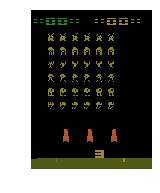

In [101]:
anim = render_state(frames)
HTML(anim.to_jshtml())

Record video file.

In [0]:
from gym import wrappers

# wrap env for recording video
envw = wrappers.Monitor(env, "/tmp/SpaceInvaders-v0", force=True)

In [0]:
for episode in range(2):
    observation = envw.reset()
    step = 0
    total_reward = 0

    while True:
        step += 1
        envw.render()
        
        action = envw.action_space.sample()
        observation, reward, done, info = envw.step(action)
        total_reward += reward
        if done:
            print("Episode: {0},\tSteps: {1},\tscore: {2}"
                  .format(episode, step, total_reward)
            )
            break
envw.close()

Download videos on runnning.

In [0]:
from google.colab import files
import glob

for file in glob.glob("openaigym.video.*.mp4"):
  files.download(file)

## Step 9: Test and Watch our Agent play 👀 [COPIED FROM PREVIOUS CELL]

In [7]:
# Codes in this cell were copied from the previous cell (and modified)
frames = [] # modification to make rendering works

with tf.Session() as sess:
    total_test_rewards = []
    
    # Load the model
    saver.restore(sess, "./models/model.ckpt")
    
    for episode in range(1):
        total_rewards = 0
        
        state = env.reset()
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
        print("****************************************************")
        print("EPISODE ", episode)
        
        while True:
            # Reshape the state
            state = state.reshape((1, *state_size))
            # Get action from Q-network 
            # Estimate the Qs values state
            Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state})
            
            # Take the biggest Q value (= the best action)
            choice = np.argmax(Qs)
            action = possible_actions[choice]
            
            #Perform the action and get the next_state, reward, and done information
            next_state, reward, done, _ = env.step(action)
            
            # env.render() # modification to make rendering works
            frames.append(env.render(mode = 'rgb_array')) # modification to make rendering works
            
            total_rewards += reward

            if done:
                print ("Score", total_rewards)
                total_test_rewards.append(total_rewards)
                break
                
                
            next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
            state = next_state
            
    env.close()

NameError: ignored

In [2]:
anim = render_state(frames)
HTML(anim.to_jshtml())

NameError: ignored